<a href="https://colab.research.google.com/github/Dunckleosteus/Python-Assesement/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [15]:
!rm export_2021.txt
!wget https://raw.githubusercontent.com/Dunckleosteus/Python-Assesement/refs/heads/main/export_2021.txt

rm: cannot remove 'export_2021.txt': No such file or directory
--2025-01-08 18:48:52--  https://raw.githubusercontent.com/Dunckleosteus/Python-Assesement/refs/heads/main/export_2021.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1262416 (1.2M) [text/plain]
Saving to: ‘export_2021.txt’

export_2021.txt     100%[===================>]   1.20M  --.-KB/s    in 0.01s   

2025-01-08 18:48:52 (104 MB/s) - ‘export_2021.txt’ saved [1262416/1262416]



# First 5 values

In [42]:
df = pd.read_csv("/content/export_2021.txt", sep="\t")
df.head(5)

# Last 5 values

In [45]:
df.tail(5)

,Date,Time,Temperature,Pressure,Rain,solar_rad,wind_speed,month
34213,31/12/2021,22:45,-1.8,1035.8,0.0,0,0.0,12
34214,31/12/2021,23:00,-1.8,1035.8,0.0,0,0.0,12
34215,31/12/2021,23:15,-1.9,1035.8,0.0,0,0.0,12
34216,31/12/2021,23:30,-2,1035.7,0.0,0,0.0,12
34217,31/12/2021,23:45,-2,1035.6,0.0,0,0.0,12


# Median temperature for each month (not sure why different)

In [201]:
# first convert to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")  # Adjust format if necessary
df["month"] = df["Date"].dt.month

# some of the temperature valeus are = ---, these must be removed
df = df.loc[df["Temperature"]!= "---"]
# now that incorrect values are removed they can be converted to string
df["Temperature"] = df["Temperature"].astype(float)

df.groupby("month")["Temperature"].median()

,Temperature
month,
1,-2.70
2,2.00
3,3.70
4,6.70
5,9.70
6,16.90
7,17.45
8,17.10
9,14.10


# Total rainfall by month

In [203]:
df = pd.read_csv("/content/export_2021.txt", sep="\t")
df["month"] = df["Date"].str.split("/").str[1]
df["year"] = df["Date"].str.split("/").str[2]

df = df.loc[(df["month"]!= "---") & (df["year"]!= "---")  & (df["Temperature"]!= "---")]
df["Rain"].astype(float)
df.groupby("month")["Rain"].sum()

,Rain
month,
01,28.4
02,17.0
03,10.2
04,58.0
05,147.8
06,45.4
07,33.0
08,14.0
09,58.0


# Total rainfall 2021

In [205]:
df = pd.read_csv("/content/export_2021.txt", sep="\t")
df["month"] = df["Date"].str.split("/").str[1]
df["year"] = df["Date"].str.split("/").str[2]

df = df.loc[(df["month"]!= "---") & (df["year"]!= "---")  & (df["Temperature"]!= "---")]
df["Rain"].astype(float)
total_rain = df.loc[df["year"]=="2021"]["Rain"].sum()
print(f"total rainfall in 2021 = {total_rain}")

total rainfall in 2021 = 546.6


# Total of no windy days in 2021
(not a very elegant way)

In [207]:
df = pd.read_csv("/content/export_2021.txt", sep="\t")
# creating month field from date
df["year"] = df["Date"].str.split("/").str[2]

# convert wind field to numeric values using astype()
df["wind_speed"] = df["wind_speed"].astype(float)
# filter by windspeed = 0 and year = 2021
df = df.loc[df["year"]=="2021"]
# group by date
result = len([x for x in df.groupby("Date")["wind_speed"].sum() if x == 0])
print(f"number of days without wind in 2021 = {result}")

number of days without wind in 2021 = 9


# Display the data on a plot divided into 4 subplots:
1. Subplot 1: raw rainfall data
2. Subplot 2: cumulative daily rainfall
3. Subplot 3: monthly median temperature and the cumulative monthly rainfalls (x-axis :
time, y_axis1 : median temperature, y-axis 2 : monthly rainfall – bar chart plot)
4. days without wind


> not sure why values are shifted compared to expected results.

<ipython-input-223-d43d83235666>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Temperature"] = temp_df["Temperature"].astype(float) # then convert to float


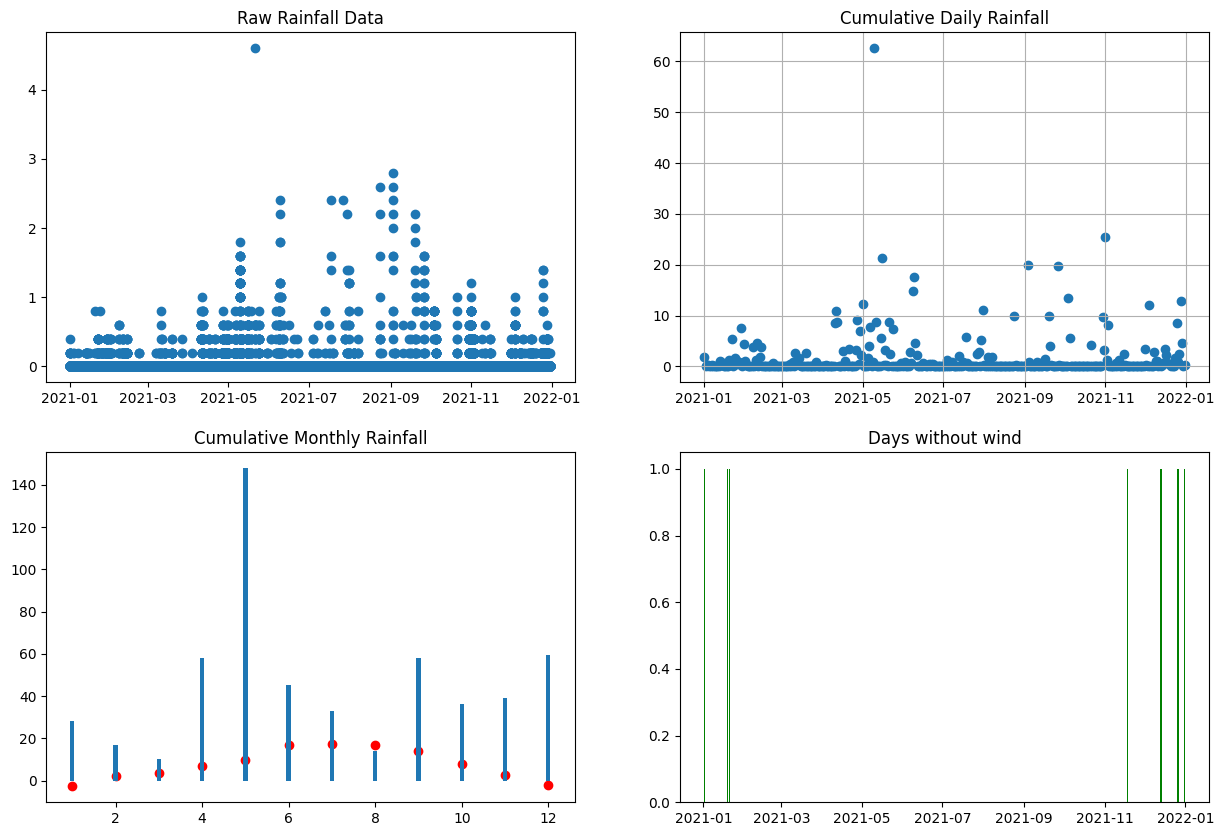

In [223]:
from re import X
import matplotlib.pyplot as plt
from datetime import datetime

# open file again
df = pd.read_csv("/content/export_2021.txt", sep="\t")

df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.month

fig, axs = plt.subplots(nrows= 2, ncols=2, figsize=(15, 10))
# plot rainfall data
axs[0][0].scatter(df["Date"], df["Rain"].astype(float))
axs[0][0].set_title("Raw Rainfall Data")

# daily rainfall data
daily_rainfall = df.groupby("Date")["Rain"].sum()

axs[0][1].scatter(daily_rainfall.index, daily_rainfall.values)
axs[0][1].set_title("Cumulative Daily Rainfall")
axs[0][1].grid()

# monthly median temperature
temp_df = df.loc[df["Temperature"]!= "---"] # remove incorrect values
temp_df["Temperature"] = temp_df["Temperature"].astype(float) # then convert to float
temp_df_results = temp_df.groupby("month")["Temperature"].median()
axs[1][0].scatter(temp_df_results.index, temp_df_results.values, c="red")
axs[1][0].set_title("Monthly Median Temperature")

# cumulative monthly rainfall
month_rain_df = df.groupby("month")["Rain"].sum()
axs[1][0].bar(month_rain_df.index, month_rain_df.values, width=0.1)
axs[1][0].set_title("Cumulative Monthly Rainfall")

# days without wind (not elegant but it works)
df["wind_speed"] = df["wind_speed"].astype(float)
yvalues = [1 for x in df.groupby("Date")["wind_speed"].sum() if x == 0]

zz = zip(df.groupby("Date")["wind_speed"].sum().index, df.groupby("Date")["wind_speed"].sum())
xvalues = [x[0] for x in zz if x[1]==0]
axs[1][1].bar(xvalues, yvalues, color="green")
axs[1][1].set_title("Days without wind")
plt.show()